In [1]:
from __future__ import print_function
#Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import numpy as np
from getdist import plots, MCSamples, chains
import getdist, IPython
print('Version: ',getdist.__version__)
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

Version:  1.3.3
GetDist Version: 1.3.3, Matplotlib version: 3.4.3


In [2]:
download_dir = "./"
histograms_dir="posteriors/"
huevos_dir="confidenceRegions/"


In [3]:
#Load from file
from getdist import loadMCSamples, chains, MCSamples

# Load individual samples:
samples1 = loadMCSamples('./chain_JLA', settings={'ignore_rows':0.3})
#samples2 = loadMCSamples('./Results/sMGPT_IRR/Chains/GR_z05_IRR_bin02_MQH_sMGPT-MCExt', settings={'ignore_rows':0.3})

#samples = MCSamples.makeSingleSamples(self, names=names, filename="", single_thin=None)


In [4]:
# GR:
histogram1=download_dir+histograms_dir+"JLA_bin01"+"_histograms.pdf"
#histogram2=download_dir+histograms_dir+"GR_z05_IRR_bin02"+"_histograms.pdf"
#histogram3=download_dir+histograms_dir+"GR_z10_IRR_bin01"+"_histograms.pdf"
#histogram4=download_dir+histograms_dir+"GR_z10_IRR_bin02"+"_histograms.pdf"


In [5]:
# LCDM:
huevos1=download_dir+huevos_dir+"JLA_bin01"+"_huevos.pdf"
#huevos2=download_dir+huevos_dir+"GR_z05_IRR_bin02"+"_huevos.pdf"
#huevos3=download_dir+huevos_dir+"GR_z10_IRR_bin01"+"_huevos.pdf"
#huevos4=download_dir+huevos_dir+"GR_z10_IRR_bin02"+"_huevos.pdf"


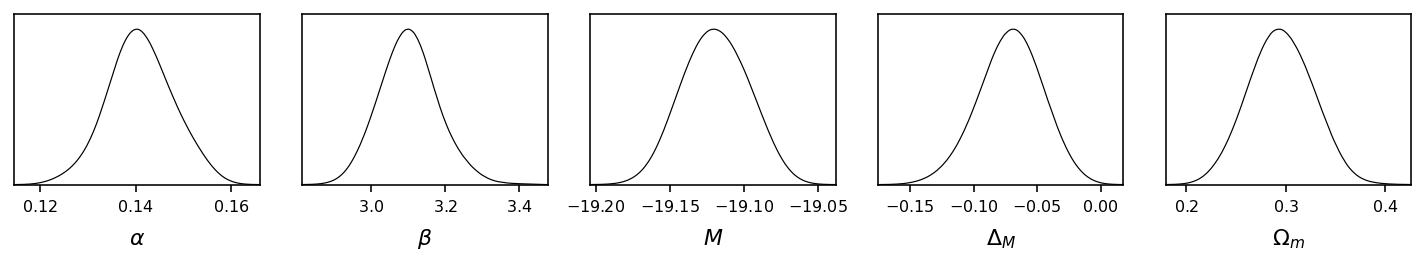

In [6]:
# Multiple 1D subplots

g = plots.get_subplot_plotter(width_inch=10)

# LCDM:
g.plots_1d(samples1, ['alpha', 'beta', 'M', 'Delta_M','Omega_m'], nx=5);
g.export(histogram1)
#g.plots_1d(samples2, ['p1', 'p2', 'p3', 'p4','p5','p6'], nx=6);
#g.export(histogram2)


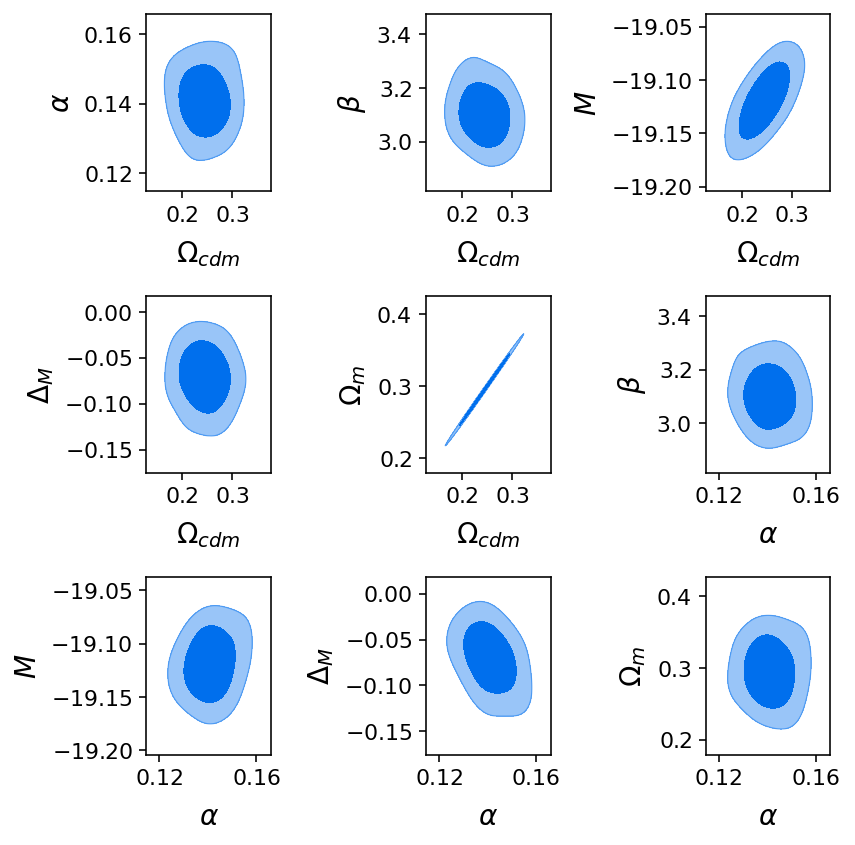

In [7]:
# Multiple 2D subplots
g = plots.get_subplot_plotter(subplot_size=2.0)
g.settings.scaling = False # prevent scaling down font sizes even though small subplots

# LCDM:
g.plots_2d(samples1, param_pairs=[['Omega_cdm','alpha'], ['Omega_cdm','beta'],['Omega_cdm', 'M'],['Omega_cdm', 'Delta_M'],['Omega_cdm', 'Omega_m'], ['alpha', 'beta'], ['alpha', 'M'], ['alpha', 'Delta_M'],['alpha', 'Omega_m']], 
           nx=3, ny=2, filled=True);
g.export(huevos1)
#g.plots_2d(samples2, param_pairs=[['p1', 'p2'], ['p1', 'p3'],['p1', 'p4'], ['p2', 'p3'], ['p2', 'p4'], ['p3', 'p4']], 
#           nx=3, ny=2, filled=True);
#g.export(huevos2)
#g.plots_2d(samples3, param_pairs=[['p1', 'p2'], ['p1', 'p3'],['p1', 'p4'], ['p2', 'p3'], ['p2', 'p4'], ['p3', 'p4']], 
#           nx=3, ny=2, filled=True);
#g.export(huevos3)
#g.plots_2d(samples4, param_pairs=[['p1', 'p2'], ['p1', 'p3'],['p1', 'p4'], ['p2', 'p3'], ['p2', 'p4'], ['p3', 'p4']], 
#           nx=3, ny=2, filled=True);
#g.export(huevos4)



In [8]:
print(samples1.getInlineLatex('Omega_cdm',limit=1))
#print(samples2.getInlineLatex('p1',limit=1))

print(samples1.getInlineLatex('alpha',limit=1))
#print(samples2.getInlineLatex('p2',limit=1))

print(samples1.getInlineLatex('beta',limit=1))
#print(samples2.getInlineLatex('p3',limit=1))

print(samples1.getInlineLatex('M',limit=2))
#print(samples2.getInlineLatex('p4',limit=2))

print(samples1.getInlineLatex('Delta_M',limit=1))
#print(samples2.getInlineLatex('p5',limit=2))

print(samples1.getInlineLatex('Omega_m',limit=1))
#print(samples2.getInlineLatex('p6',limit=2))

\Omega{}_{cdm } = 0.245\pm 0.033
\alpha = 0.1410\pm 0.0070
\beta = 3.103^{+0.074}_{-0.084}
M = -19.119^{+0.043}_{-0.043}
\Delta{}_{M } = -0.071^{+0.027}_{-0.024}
\Omega{}_{m } = 0.295\pm 0.033


In [9]:
print(samples1.PCA(['Omega_cdm','alpha','beta','M','Delta_M','Omega_m']))

PCA for parameters:
         1 :ln(\Omega{}_{cdm })
         2 :ln(\alpha)
         3 :ln(\beta)
         4 :M
         5 :\Delta{}_{M }
         6 :ln(\Omega{}_{m })

Correlation matrix for reduced parameters
   Omega_cdm :  1.0000 -0.0487 -0.1561  0.6369 -0.0765  0.9999
       alpha : -0.0487  1.0000 -0.0884  0.1509 -0.3512 -0.0469
        beta : -0.1561 -0.0884  1.0000 -0.0918  0.0274 -0.1564
           M :  0.6369  0.1509 -0.0918  1.0000 -0.4618  0.6378
     Delta_M : -0.0765 -0.3512  0.0274 -0.4618  1.0000 -0.0768
     Omega_m :  0.9999 -0.0469 -0.1564  0.6378 -0.0768  1.0000

e-values of correlation matrix
PC 1:   0.0001
PC 2:   0.2901
PC 3:   0.6501
PC 4:   0.9868
PC 5:   1.4311
PC 6:   2.6417

e-vectors
  1:  0.7068  0.2778 -0.1793  0.0211  0.2503 -0.5727
  2:  0.0013 -0.0213 -0.7375 -0.1613 -0.6519 -0.0687
  3: -0.0001  0.0349 -0.2527  0.9553  0.0331  0.1455
  4:  0.0012 -0.7918  0.1993  0.1673 -0.1862 -0.5203
  5:  0.0007 -0.4671 -0.5364 -0.1802  0.6438  0.2170
  6: -0.7074  